# Support Vector Data Description (SVDD)

**Prepared by**
-Samaneh Dandani**

**Contact : samanedandani@gmail.com**

![Dandani](../Classification/Image_Classification/Dandani.PNG)

- Mr. Saeedi
**Contact: Telegram :@amirahs2000**

![Saeedi_1403](../Clustering/ClusteringImages/Saeedi_1403.png)

- Iman Ahmadi** Contact in Telegram: @Takavosh

![Ahmadi](../Classification/Image_Classification/Ahmadi.jpg)



Support Vector Data Description (SVDD) is indeed a one-class classifier primarily used for anomaly detection and outlier detection. Unlike traditional classification methods that distinguish between multiple classes, SVDD focuses on defining a boundary around a single class of data, effectively distinguishing it from all other data points that are considered anomalies or outliers.



This classifier was proposed by Tax in 2004. It is a one-class classifier based on support vectors aimed at providing a description for data of a single class. Using this type of classifier, a decision boundary is obtained that makes it easy to determine whether new data belong to the target class or are outliers. By combining several one-class classifiers, powerful multi-class classifiers can also be created. Additionally, one of the significant advantages of one-class classifiers is that they do not require samples from other classes in the learning process. In other words, to obtain a suitable decision boundary and evaluate the membership of test samples to a class, the system only needs a limited number of training data from the same class.

The assumed boundary for this classifier is a hypersphere with center $a$ and radius $R$, covering the learning samples of the target class with the smallest possible radius. In the figure below, the hypersphere surrounding the data represents the boundary of the SVDD classifier.

Now, suppose we have outlier samples mistakenly labeled as target class samples or samples from the target class affected by noise, changing their position. These samples negatively impact the classifier's boundary. To address this issue, the inequality constraints can be relaxed, allowing noisy or outlier samples to be excluded from the hypersphere.

The error function is $\varepsilon$-insensitive loss:

$$
\begin{gathered}
L(e)=\sum_{i=1}^{n} \max \left(e_{i}-\varepsilon, 0\right) \\
e_{i}=\left\|x_{i}-\mu\right\|^{2}
\end{gathered}
$$

We want to minimize the error:

$$
\min _{\mu} \sum_{i=1}^{n} L\left(e_{i}\right)=\min _{\mu} \sum_{i=1}^{n} \xi_{i}
$$

subject to

$$
\begin{aligned}
\xi_{i} & \geq 0 \quad i=1 \ldots n \\
\xi_{i} \geq \| x_{i} & -\mu \|^{2}-\varepsilon \quad i=1 \ldots n
\end{aligned}
$$

We want the radius of the circle to be $\varepsilon$. Some data outside the circle have a positive slack variable $\left(\xi_{i} \geq 0\right)$, while for data inside the circle, this variable is zero. Besides the above loss function, we use a regularization term $\left(\lambda \varepsilon^{2}\right)$.

$$
\min _{\mu} \sum_{i=1}^{n} \xi_{i}+\lambda \varepsilon^{2}
$$

subject to

$$
\xi_{i} \geq 0 \quad i=1 \ldots n
$$


$$
\xi_{i}+\varepsilon \geq\left\|x_{i}-\mu\right\|^{2} \quad i=1 \ldots n
$$

$\lambda$ is the tuning parameter, usually between ( 0.5 and 1 ), and can be taken as 1. Instead of $\varepsilon^{2}$, we use $R^{2}$ as the radius of the circle is more tangible for us. Also, we replace $\mu$ with $a$.

We want the circle to fit the data with the minimum radius while not placing the circle within the data despite $\xi_{i}$. The variables $a$ and $R$ are the solutions to the optimization problem. In this problem, $n$ represents the number of data.

To reach a hypersphere that provides a better description of the target samples, learning error is allowed. Due to outliers or noise, the circle enlarges; to mitigate this, $\xi_{i}$ is used.

The mathematical model is shown below as an optimization problem:

$$
\min _{a} R^{2}+C \sum_{i=1}^{n} \xi_{i}
$$

subject to

$$
\begin{gathered}
\xi_{i} \geq 0 \quad i=1 \ldots n \\
\left\|x_{i}-a\right\|^{2} \leq R^{2}+\xi_{i} \quad i=1 \ldots n
\end{gathered}
$$

The parameter $C$ balances the radius of the hypersphere and the learning error. To solve this optimization problem, the Lagrangian function is formed as follows, where $\alpha_{i}$ and $\gamma_{i}$ are the Lagrange multipliers.

$$
L=R^{2}+C \sum_{i=1}^{n} \xi_{i}+\sum_{i=1}^{n} \alpha_{i}\left(\left\|x_{i}-a\right\|^{2}-R^{2}-\xi_{i}\right)-\sum_{i=1}^{n} \gamma_{i} \xi_{i}
$$

To apply the necessary KKT conditions, the partial derivatives with respect to the variables $a, R$, and $\xi_{i}$ are taken and set to zero:

$$
\begin{gathered}
\frac{\partial L}{\partial R}=2 R-\sum_{j=1}^{n} \alpha_{i}=0 \quad \Rightarrow \quad \sum_{i=1}^{n} \alpha_{i}=1 \\
\frac{\partial L}{\partial a}=2 \sum_{j=1}^{n} \alpha_{i} x_{i}-a=0 \quad \Rightarrow \quad a=\sum_{i=1}^{n} \alpha_{i} x_{i} \\
\frac{\partial L}{\partial \xi_{i}}=0 \quad \Rightarrow \quad \alpha_{i}+\gamma_{i}=C
\end{gathered}
$$

After substituting these formulas into the dual Lagrangian function, the optimization problem appears as:

$$
\operatorname{Maximize} \quad \sum_{i=1}^{n} \alpha_{i}\left\langle x_{i}, x_{i}\right\rangle-\sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j}\left\langle x_{i}, x_{j}\right\rangle
$$

subject to

$$
0 \leq \alpha_{i} \leq C \quad i=1 \ldots n
$$


$$
\sum_{i=1}^{n} \alpha_{i}=1
$$

This optimization problem is a convex quadratic problem with a global optimal solution. After solving this optimization problem, the optimal Lagrange multipliers will be obtained.

By examining the conditions, the relationship between the Lagrange multiplier and the status of the learning sample relative to the hypersphere is described as follows:
- Samples inside the hypersphere have a Lagrange multiplier of zero.
- Samples on the hypersphere have a Lagrange multiplier between 0 and $C$.
- Samples outside the hypersphere due to learning error have a Lagrange multiplier equal to $C$.

$$
\begin{gathered}
\left\|x_{i}-a\right\|^{2}<R^{2} \quad \Rightarrow \quad \alpha_{i}=0, \quad \xi_{i}=0 \\
\left\|x_{i}-a\right\|^{2}=R^{2} \quad \Rightarrow \quad 0<\alpha_{i}<C, \quad \xi_{i}=0 \\
\left\|x_{i}-a\right\|^{2}>R^{2} \quad \Rightarrow \quad \alpha_{i}=C, \quad \xi_{i}>0
\end{gathered}
$$

To calculate $R^{2}$, it is sufficient to choose an arbitrary sample $x$ on the sphere and measure its distance from the center of the sphere:

$$
R^{2}=\|x-a\|^{2}=\left\|x \cdot x-2 \sum_{i=1}^{n} \alpha_{i} x \cdot x_{i}+\sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} x_{i} \cdot x_{j}\right\|
$$

Also, to check the membership of a test sample $z$ to the target class, it is enough to measure the distance from this sample to the center using the following formula and compare the result with $R^{2}$ :

$$
f(z)=\left\|z \cdot z-2 \sum_{i=1}^{n} \alpha_{i} z \cdot x_{i}+\sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} x_{i} \cdot x_{j}\right\| \leq R^{2}
$$

Considering this relation, only samples with non-zero Lagrange multipliers are involved in determining the classifier boundary. Thus, this method falls under the category of Support Vector Machines (SVM). If the distribution of the target class learning samples is non-spherical, the obtained hypersphere will not be a good descriptor for the target class. To overcome this issue, non-linear mappings can be used. Using these mappings, samples are mapped to a higher-dimensional space called the feature space. After computing the classifier boundary in the feature space $(\phi)$, flexible and appropriate boundaries are obtained in the input space. For example, as shown below, samples are first mapped to the feature space using non-linear mapping $\phi$, and the optimal values of the variables $a$ and $R$ are calculated. Then, by applying the inverse mapping to the input space, the appropriate and flexible boundary is computed
and drawn. As seen, this boundary aligns with the shape of the learning sample distribution, whereas direct use of the hypersphere in the input space does not seem suitable.

The problem with using non-linear mappings is finding the appropriate mapping and the high computational complexity during learning and classification. The relationship between the mapping $\phi$ and the kernel function $K$ is as follows:

$$
K(x, y)=\langle\phi(x), \phi(y)\rangle
$$

Thus, after replacing $x$ with $\phi(x)$ in the previous relations, all dot products of the form $\phi(x) \cdot \phi(y)$ are replaced with the kernel function $K(x, y)$ :

$$
L=\sum_{i} \alpha_{i} K\left(x_{i}, x_{i}\right)-\sum_{i, j} \alpha_{i} \alpha_{j} K\left(x_{i}, x_{j}\right)
$$

The most commonly used kernel functions are RBF and Polynomial kernels. The formulas for these functions are as follows:

$$
\begin{aligned}
K(x, y) & =\exp \left(-\frac{\|x-y\|^{2}}{2 \sigma^{2}}\right) \quad \text { RBF Kernel } \\
K(x, y) & =(x \cdot y+b)^{d} \quad \text { Polynomial Kernel }
\end{aligned}
$$

In practice, the linear kernel can be used to verify the implementation of the algorithm, then the appropriate kernel is chosen based on the specific data set and the classifier's performance.

 gamma: 0.1, Accuracy: 0.8888888888888888
 gamma: 1, Accuracy: 0.9777777777777777
 gamma: 10, Accuracy: 0.9777777777777777


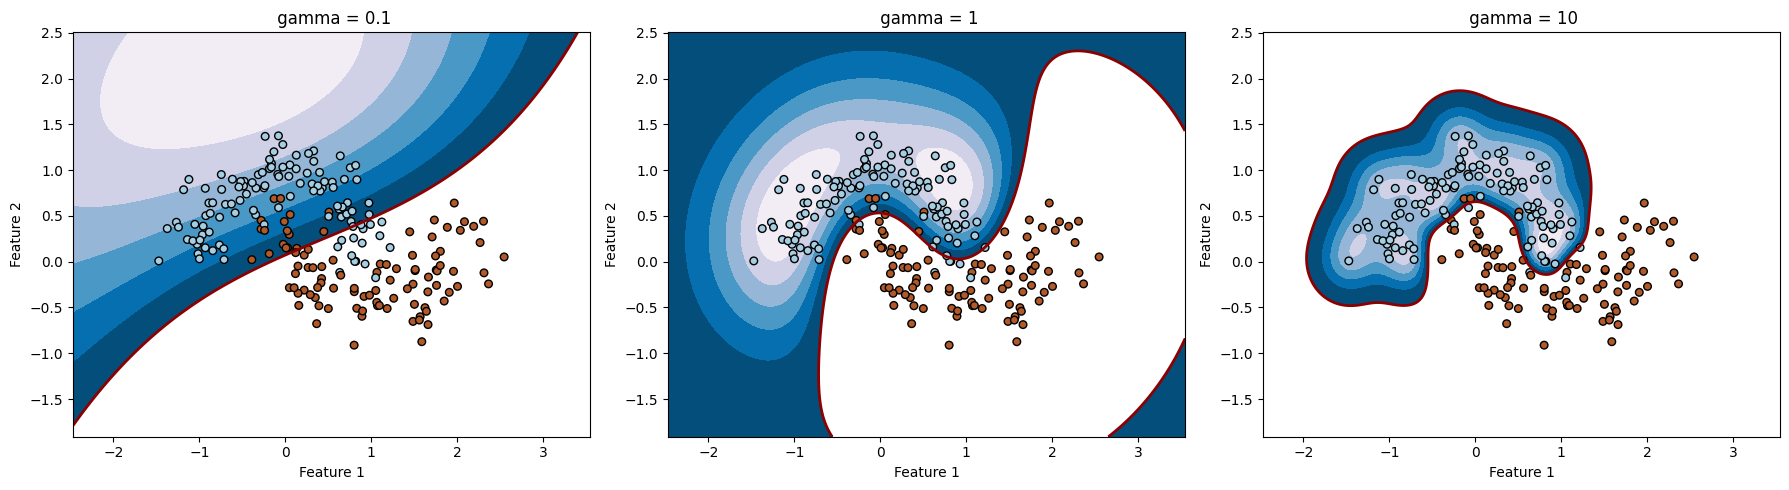

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# داده های غیرخطی "ماه تو در تو" با نویز تولید کنید
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# داده ها را به مجموعه های آموزشی و آزمایشی تقسیم کنید
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# مقادیر مختلف gamma
gamma=  [0.1, 1, 10]

# ترسیم داده ها و مرزهای تصمیم گیری برای هر مقدار gamma
fig, axes = plt.subplots(1, len(gamma), figsize=(18, 5))

for i, gamma in enumerate(gamma):
    # یک شی طبقه بندی کننده SVM با هسته RBF و gamma متفاوت ایجاد کنید
    clf = svm.SVC(kernel='rbf', gamma = gamma)

    # طبقه بندی کننده SVM را روی داده های آموزشی آموزش دهید
    clf.fit(X_train, y_train)

    # کلاس های داده های آزمون را پیش بینی کنید
    y_pred = clf.predict(X_test)

    # دقت طبقه بندی کننده را محاسبه کنید
    accuracy = accuracy_score(y_test, y_pred)

    # چاپ دقت طبقه بندی کننده
    print(f" gamma: { gamma }, Accuracy: {accuracy}")

    # ترسیم داده ها و مرز تصمیم گیری
    ax = axes[i]

    # ایجاد شبکه ای برای ترسیم مرزهای تصمیم گیری
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # ترسیم مرز تصمیم گیری
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

    # ترسیم داده های آموزشی
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, edgecolors='k')

    # تنظیمات نمودار
    ax.set_title(f" gamma = { gamma }")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

sigma: 0.05, Accuracy: 0.8555555555555555
sigma: 0.1, Accuracy: 0.9555555555555556
sigma: 0.3, Accuracy: 0.9888888888888889
sigma: 0.5, Accuracy: 0.9888888888888889
sigma: 1.0, Accuracy: 0.9222222222222223
sigma: 10.0, Accuracy: 0.8666666666666667


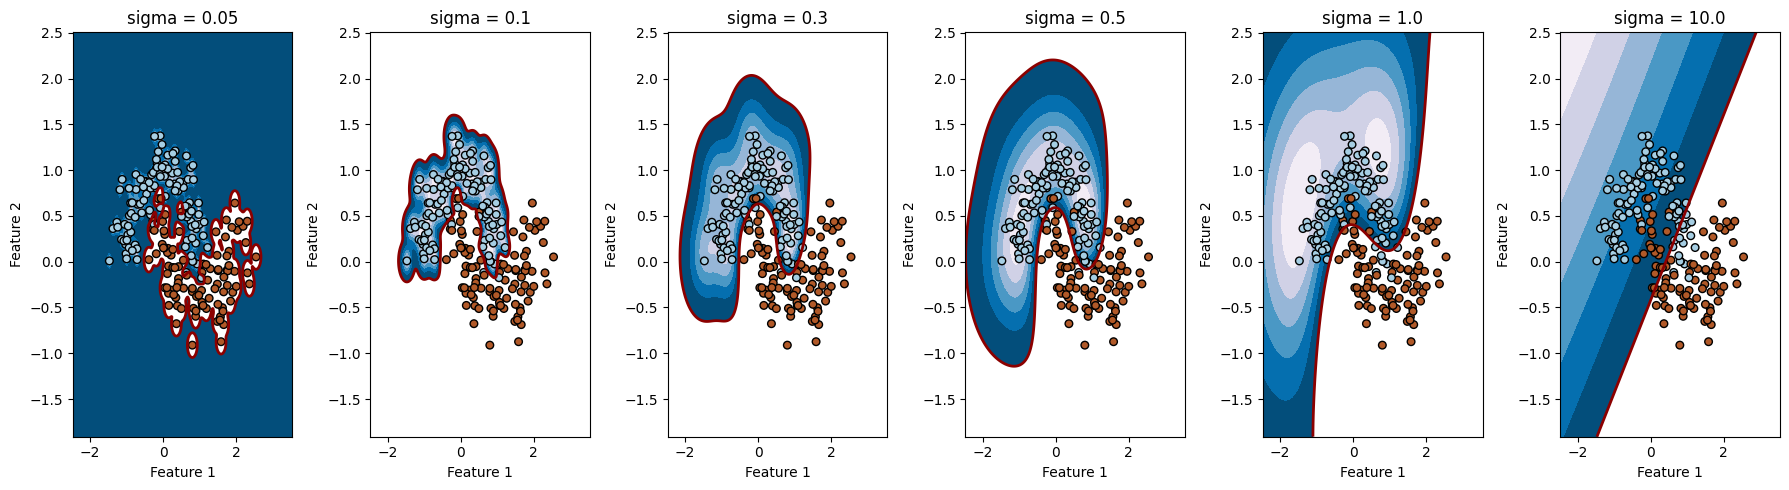

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# داده های غیرخطی "ماه تو در تو" با نویز تولید کنید
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# داده ها را به مجموعه های آموزشی و آزمایشی تقسیم کنید
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# مقادیر مختلف sigma
sigmas = [0.05, 0.1, 0.3, 0.5, 1.0, 10.0]

# ترسیم داده ها و مرزهای تصمیم گیری برای هر مقدار sigma
fig, axes = plt.subplots(1, len(sigmas), figsize=(18, 5))

for i, sigma in enumerate(sigmas):
    # محاسبه مقدار gamma از sigma
    gamma = 1 / (2 * sigma ** 2)

    # یک شی طبقه بندی کننده SVM با هسته RBF و gamma متفاوت ایجاد کنید
    clf = svm.SVC(kernel='rbf', gamma=gamma)

    # طبقه بندی کننده SVM را روی داده های آموزشی آموزش دهید
    clf.fit(X_train, y_train)

    # کلاس های داده های آزمون را پیش بینی کنید
    y_pred = clf.predict(X_test)

    # دقت طبقه بندی کننده را محاسبه کنید
    accuracy = accuracy_score(y_test, y_pred)

    # چاپ دقت طبقه بندی کننده
    print(f"sigma: {sigma}, Accuracy: {accuracy}")

    # ترسیم داده ها و مرز تصمیم گیری
    ax = axes[i]

    # ایجاد شبکه ای برای ترسیم مرزهای تصمیم گیری
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # ترسیم مرز تصمیم گیری
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

    # ترسیم داده های آموزشی
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, edgecolors='k')

    # تنظیمات نمودار
    ax.set_title(f"sigma = {sigma}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

C: 0.1, Accuracy: 0.9111111111111111
C: 0.5, Accuracy: 0.9666666666666667
C: 1.0, Accuracy: 0.9777777777777777


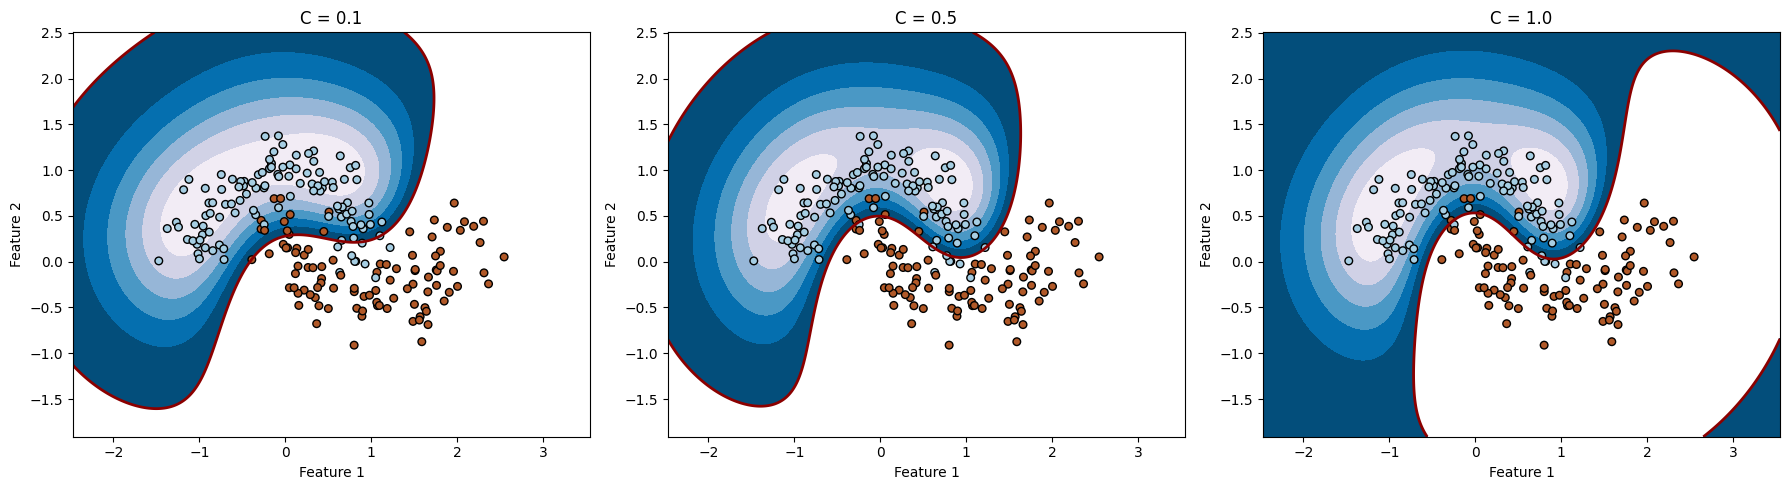

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# داده های غیرخطی "ماه تو در تو" با نویز تولید کنید
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# داده ها را به مجموعه های آموزشی و آزمایشی تقسیم کنید
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# مقادیر مختلف gamma (معادل وارون مربع سیگما)
gamma = 1
C = [0.1, 0.5, 1.0]
# ترسیم داده ها و مرزهای تصمیم گیری برای هر مقدار C
fig, axes = plt.subplots(1, len(C), figsize=(18, 5))

for i, C in enumerate(C):
    # یک شی طبقه بندی کننده SVM با هسته RBF و C متفاوت ایجاد کنید
    clf = svm.SVC(kernel='rbf', gamma=gamma , C=C)

    # طبقه بندی کننده SVM را روی داده های آموزشی آموزش دهید
    clf.fit(X_train, y_train)

    # کلاس های داده های آزمون را پیش بینی کنید
    y_pred = clf.predict(X_test)

    # دقت طبقه بندی کننده را محاسبه کنید
    accuracy = accuracy_score(y_test, y_pred)

    # چاپ دقت طبقه بندی کننده
    print(f"C: {C}, Accuracy: {accuracy}")

    # ترسیم داده ها و مرز تصمیم گیری
    ax = axes[i]

    # ایجاد شبکه ای برای ترسیم مرزهای تصمیم گیری
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # ترسیم مرز تصمیم گیری
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

    # ترسیم داده های آموزشی
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, edgecolors='k')

    # تنظیمات نمودار
    ax.set_title(f"C = {C}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()